In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_path = "./BreastTissue.xls"
data = pd.read_excel(data_path, sheet_name='Data')
classes = data['Class']
del data['Case #']
data.head(10)
# class classification
# IO Сопротивление (Ом) на нулевой частоте
# PA500 Фазовый угол при 500 кГц
# HFS высокочастотный наклон фазового угла
# DA Расстояние импеданса между концами спектра
# AREA площадь под спектром
# A/DA, Площадь нормированная по DA
# MAX IP максимум спектра
# DR Расстояние между I0 и реальной частью точки максимальной частоты
# P длина спектральной кривой

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
5,car,389.872978,0.150098,0.097738,118.625814,2475.557078,20.868620,49.757149,107.686164,429.385788
6,car,290.455141,0.144164,0.053058,74.635067,1189.545213,15.938154,35.703331,65.541324,330.267293
7,car,275.677393,0.153938,0.187797,91.527893,1756.234837,19.187974,39.305183,82.658682,331.588302
8,car,470.000000,0.213105,0.225497,184.590057,8185.360837,44.343455,84.482483,164.122511,603.315715
9,car,423.000000,0.219562,0.261799,172.371241,6108.106297,35.435762,79.056351,153.172903,558.274515


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    object 
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A/DA    106 non-null    float64
 7   Max IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.4+ KB


In [4]:
data.columns

Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
       'P'],
      dtype='object')

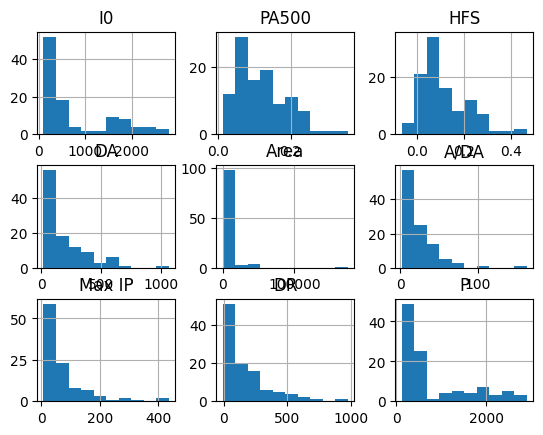

In [5]:
data.hist();

## Показатель A/DA Позволяет отделять классы car и adi от остальных

/tmp/ipykernel_10986/957567340.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Class',


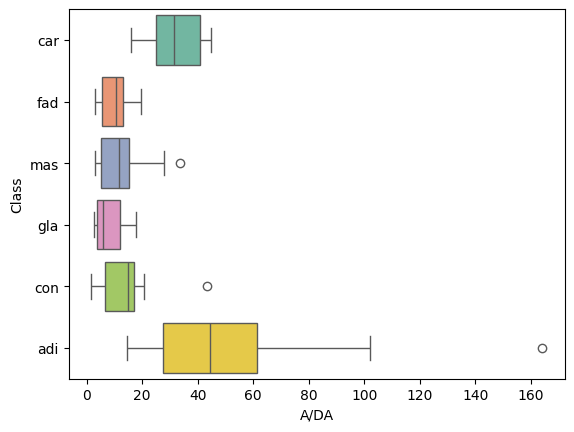

In [6]:
top_data = data[['Class','A/DA']]
top_data = top_data.groupby('Class').sum()
top_data = top_data.sort_values('A/DA', ascending=False)
top_data = top_data.index.values
sns.boxplot(y='Class', 
            x='A/DA', 
            data=data[data.Class.isin(top_data)], palette='Set2');

## Показатель MAX IP позволяет четко отделить класс adi, классы con, car от классов fad, mas, gla

/tmp/ipykernel_10986/4103250486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Class',


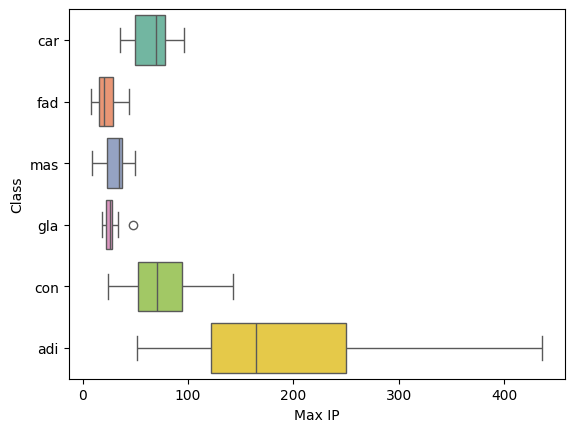

In [7]:
top_data = data[['Class','Max IP']]
top_data = top_data.groupby('Class').sum()
top_data = top_data.sort_values('Max IP', ascending=False)
top_data = top_data.index.values
sns.boxplot(y='Class', 
            x='Max IP', 
            data=data[data.Class.isin(top_data)], palette='Set2');

## Показатель P позволяет четко определить отдельно классы con, adi

/tmp/ipykernel_10986/481328391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Class',


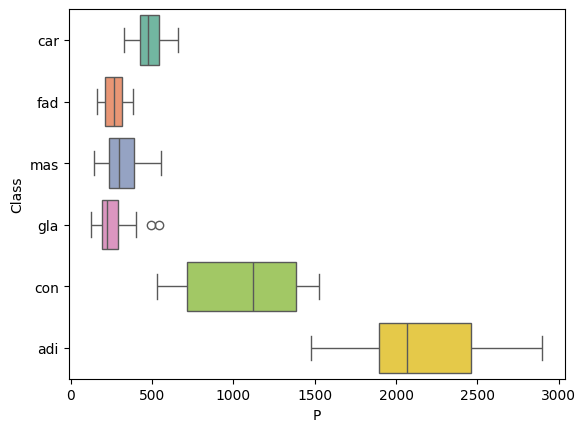

In [8]:
top_data = data[['Class','P']]
top_data = top_data.groupby('Class').sum()
top_data = top_data.sort_values('P', ascending=False)
top_data = top_data.index.values
sns.boxplot(y='Class', 
            x='P', 
            data=data[data.Class.isin(top_data)], palette='Set2');

## Промежуточный итог
## класс adi можно отличить исходя из параметра Max IP
## класс con можно отличить из параметра P, а после отличить от adi из пар-ра Max IP
## класс car можно отличить из пар-ра A/DA, а потом от adi из пар-ра Max IP
## Классы fad, mas, gla остаются похожими исходя из пар-ров P, Max IP, A/DA

/tmp/ipykernel_10986/2514092278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Class',


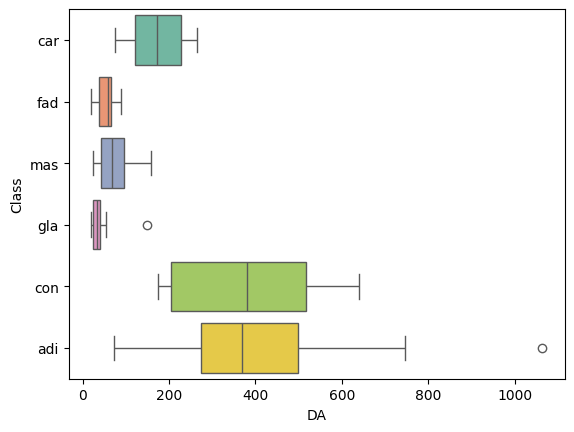

In [9]:
top_data = data[['Class','DA']]
top_data = top_data.groupby('Class').sum()
top_data = top_data.sort_values('DA', ascending=False)
top_data = top_data.index.values
sns.boxplot(y='Class', 
            x='DA', 
            data=data[data.Class.isin(top_data)], palette='Set2');

## Класс mas можно отличить по параметру DA или DR, перед этим отбросив классы adi, con, car
## Классы gla, mas остаются тяжело отличимыми
### Сравнение классов mas, gla по параметрам DA, P, Area которые наиболее их отличают

In [10]:
data_pair = data[['DA', 'P', 'Area']]

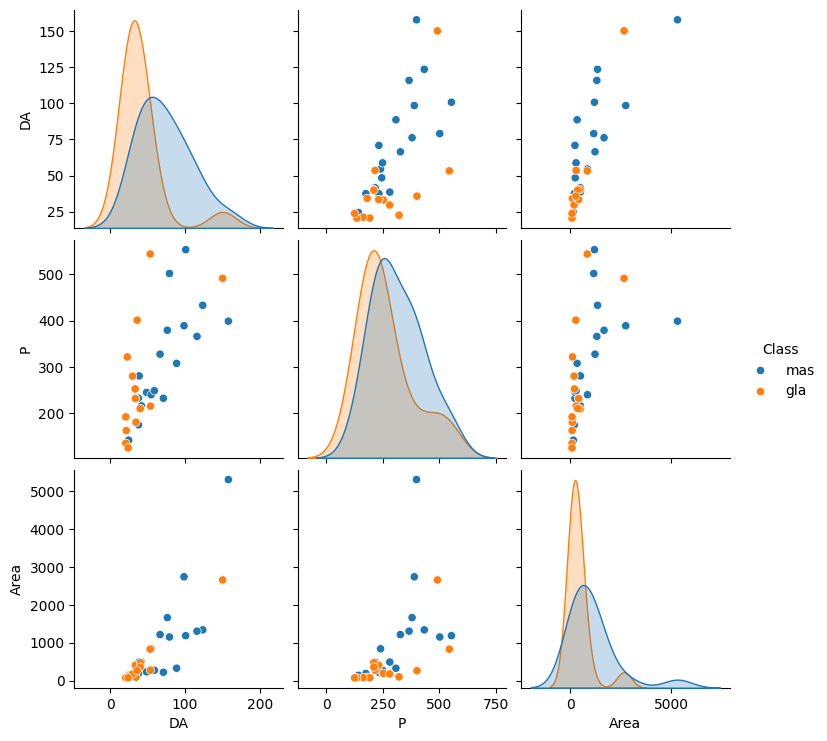

In [11]:
#sns.pairplot(data_pair);
# sns.pairplot(data[data_pair+['Class']], hue='Class');
data_pair_columns = [f for f in data_pair.columns]
data_mas = data[data['Class'] == 'mas']
data_gla = data[data['Class'] == 'gla']
data_mas_gla = pd.concat([data_mas, data_gla])
# sns.pairplot(data, hue='Class');
sns.pairplot(data_mas_gla[data_pair_columns+['Class']], hue='Class');

# data_pair_columns
# DA Max Ip, P 


## На графиках выше показано, что данные классы отличимы по признакам DA, P, Area

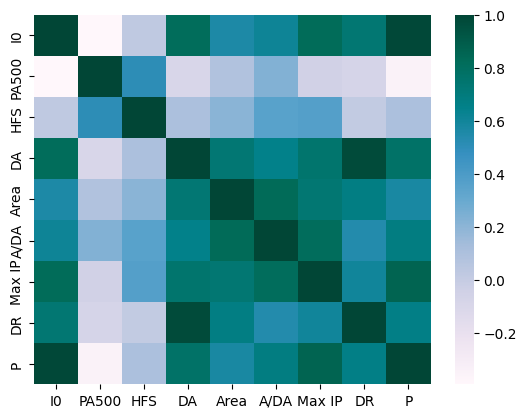

In [12]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);

In [13]:
print(data.columns)
feats=['I0', 'PA500', 'DA', 'Area']

Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR',
       'P'],
      dtype='object')


In [14]:
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['Class', 'HFS', 'A/DA', 'Max IP', 'DR', 'P'], dtype='object')

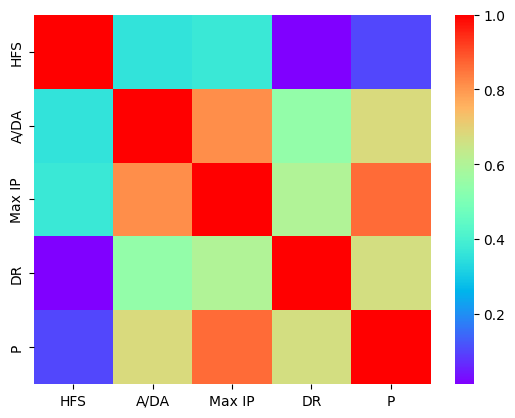

In [15]:
sns.heatmap(data_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow);

# Контрольные вопросы

**1. Перечислите функции Python, которые были изучены в рамках данной лабораторной работы и которые используются для визуализации данных.**
- Ответ: pandas.DataFrame().hist(), seaborn.countplot(), seaborn.pairplot(), pyplot.scatter(), pandas.DataFrame().corr(), seaborn.heatmap()

**2. Какая библиотека python предназначена для управления наборами данных:**
- Ответ: pandas

**3. Какая стратегия является нежелательной при обработке пропусков в данных?**
- Ответ: б) удаление строк, содержащих пропуски в данных

**4. Обоснуйте ответ на следующую проблему предварительной обработки данных: имеется независимая категориальная переменная, которая представляет собой категориальный признак, опеределнный на домене {C#, Java, Python, R}. Нужно ли применять к данному целевому признаку OneHotEncoder?**
- Ответ: применение OneHotEncoder к целевому признаку не имеет смысла, так как этот процесс предназначен для кодирования категориальных признаков, которые не являются целевыми в своем исходном виде. Кодирование целевой переменной с помощью OneHotEncoder может привести к неправильным результатам, так как это изменит смысл переменной.

**5. Какой код лучше использовать при загрузке данных из csv-файла?**
- Ответ: а) dataset = read_csv('data.csv')
